<a href="https://colab.research.google.com/github/rahatos/Soft-Computing/blob/main/Bangla%20Sentiment%20Analysis%20using%20banglaBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U watermark
!pip install -qq transformers
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

     |████████████████████████████████| 3.1 MB 5.3 MB/s 
     |████████████████████████████████| 3.3 MB 32.6 MB/s 
     |████████████████████████████████| 895 kB 37.9 MB/s 
     |████████████████████████████████| 59 kB 6.4 MB/s 
     |████████████████████████████████| 596 kB 41.6 MB/s 
Python implementation: CPython
Python version       : 3.7.12
IPython version      : 5.5.0

numpy       : 1.19.5
pandas      : 1.1.5
torch       : 1.9.0+cu111
transformers: 4.12.3



In [ ]:
import torch
import pandas as pd
from tqdm.notebook import tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
import torch
import pandas as pd
import io
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv('new.csv', encoding = 'utf-8-sig', index_col=0)

MessageError: ignored

In [ ]:
df.head()

,data,tag,label,data_type
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন,কিছুটা নেতিবাচক,2,train
1,এটা কেন হচ্ছে সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে ন...,কিছুটা নেতিবাচক,2,train
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,নিশ্চিত নেতিবাচক,1,val
3,চুরি নয় লুটপাট,নিশ্চিত নেতিবাচক,1,train
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,নিরপেক্ষ,0,train


In [ ]:
df['tag'].value_counts()

নিশ্চিত নেতিবাচক    3928
কিছুটা নেতিবাচক     3198
নিরপেক্ষ            2951
নিশ্চিত ইতিবাচক     2280
কিছুটা ইতিবাচক      1445
Name: tag, dtype: int64

In [ ]:
possible_labels = df.tag.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    if possible_label == 'কিছুটা নেতিবাচক':
        label_dict[possible_label] = 2
    elif possible_label == 'নিশ্চিত নেতিবাচক':
        label_dict[possible_label] = 1
    elif possible_label == 'নিরপেক্ষ':
        label_dict[possible_label] = 0
    elif possible_label == 'কিছুটা ইতিবাচক':
        label_dict[possible_label] = 3
    elif possible_label == 'নিশ্চিত ইতিবাচক':
        label_dict[possible_label] = 4
label_dict

{'কিছুটা ইতিবাচক': 3,
 'কিছুটা নেতিবাচক': 2,
 'নিরপেক্ষ': 0,
 'নিশ্চিত ইতিবাচক': 4,
 'নিশ্চিত নেতিবাচক': 1}

In [ ]:
df['label'] = df.tag.replace(label_dict)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
somewhat_negative = (df[df.tag == 'কিছুটা নেতিবাচক'])[:1445]
surely_negative = (df[df.tag == 'নিশ্চিত নেতিবাচক'])[:1445]
somewhat_positive = (df[df.tag == 'কিছুটা ইতিবাচক'])[:1445]
surely_positive = (df[df.tag == 'নিশ্চিত ইতিবাচক'])[:1445]
neutral = (df[df.tag == 'নিরপেক্ষ'])[:1445]

trimmed_df = pd.concat([somewhat_negative, surely_negative, somewhat_positive, surely_positive, neutral])
print(type(trimmed_df))
print(len(trimmed_df))

<class 'pandas.core.frame.DataFrame'>
7225


In [ ]:
#del df["value"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


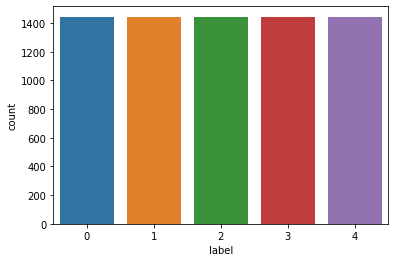

In [ ]:
sns.countplot(trimmed_df.label)
plt.xlabel('label');

In [ ]:
from transformers import BertForMaskedLM, BertTokenizer, pipeline
model = BertForMaskedLM.from_pretrained("sagorsarker/bangla-bert-base")
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#df.to_csv("data/SENTIMENT_DATASET_Modified.csv",encoding='utf-8-sig')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(trimmed_df.index.values, 
                                                  trimmed_df.label.values, 
                                                  test_size=0.20, 
                                                  random_state=42, 
                                                  stratify=trimmed_df.label.values)

In [ ]:
trimmed_df['data_type'] = ['not_set']*trimmed_df.shape[0]

trimmed_df.loc[X_train, 'data_type'] = 'train'
trimmed_df.loc[X_val, 'data_type'] = 'val'

In [ ]:
trimmed_df.groupby(['tag', 'label', 'data_type']).count()

data
tag              label data_type      
কিছুটা ইতিবাচক   3     train      1156
                       val         289
কিছুটা নেতিবাচক  2     train      1156
                       val         289
নিরপেক্ষ         0     train      1156
                       val         289
নিশ্চিত ইতিবাচক  4     train      1156
                       val         289
নিশ্চিত নেতিবাচক 1     train      1156
                       val         289

In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    trimmed_df[trimmed_df.data_type=='train'].data.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    truncation=True,
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    trimmed_df[trimmed_df.data_type=='val'].data.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    truncation=True,
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(trimmed_df[trimmed_df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(trimmed_df[trimmed_df.data_type=='val'].label.values)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2111: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
len(dataset_train), len(dataset_val)

(5780, 1445)

In [ ]:
#from simpletransformers.classification import ClassificationModel

In [ ]:
model = BertForSequenceClassification.from_pretrained("sagorsarker/bangla-bert-base",
                                                      num_labels=len(label_dict))
                                                      
""" model = ClassificationModel('bert', 'sagorsarker/bangla-bert-base', num_labels=len(label_dict), use_cuda = True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 1,
    'silent': True
}) """

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

" model = ClassificationModel('bert', 'sagorsarker/bangla-bert-base', num_labels=len(label_dict), use_cuda = True, args={\n    'reprocess_input_data': True,\n    'use_cached_eval_features': False,\n    'overwrite_output_dir': True,\n    'num_train_epochs': 1,\n    'silent': True\n}) "

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 10

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size,
                              drop_last= True)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)

In [ ]:
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
import random
import numpy as np
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [ ]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'/tmp/finetuned_Sentiment_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')


Epoch 1
Training loss: 1.5588876283292539
Validation loss: 1.4749964035790541
F1 Score (Weighted): 0.3318918363936414



Epoch 2
Training loss: 1.3921183462167694
Validation loss: 1.4920661260341777
F1 Score (Weighted): 0.3349458697314445



Epoch 3
Training loss: 1.2208119596783265
Validation loss: 1.5425826761229284
F1 Score (Weighted): 0.33501964822213925



Epoch 4
Training loss: 1.0424826477225677
Validation loss: 1.657786221545318
F1 Score (Weighted): 0.31807049671420007



Epoch 5
Training loss: 0.9189314225553229
Validation loss: 1.7102216042321303
F1 Score (Weighted): 0.32731568574835557



In [ ]:
model = BertForSequenceClassification.from_pretrained("sagorsarker/bangla-bert-base",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

In [ ]:
model.load_state_dict(torch.load('/tmp/finetuned_Sentiment_epoch_2.model', map_location=torch.device('cpu')))

In [ ]:
_, predictions, true_vals = evaluate(dataloader_validation)

In [ ]:
accuracy_per_class(predictions, true_vals)

Class: নিরপেক্ষ
Accuracy: 105/289

Class: নিশ্চিত নেতিবাচক
Accuracy: 90/289

Class: কিছুটা নেতিবাচক
Accuracy: 43/289

Class: কিছুটা ইতিবাচক
Accuracy: 100/289

Class: নিশ্চিত ইতিবাচক
Accuracy: 162/289



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mv /tmp/finetuned_Sentiment_epoch_1.model /content/drive/MyDrive/

In [ ]:
mv /content/new.csv /content/drive/MyDrive/